# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 2)

## Rental Analysis of Banglore City Using Various Parameters.

### Scenario1:--

consider you are moving to bangalore for job settlement and this is the first time you are visiting Bangalore.you might not be aware of bangalore and didn't have any connections there so it will be very difficult for you to settle there. So to tackle this problem we shall use Machine Learning Algorithms alongside with Foursquare API to get the details of various appartments in bangalore along with their precise Latitudes and Longitudes(available Below). 
Now for choosing for a best appartment you need to consider the following facts:
1. Are there any Restaurants Available nearby to Appartment?.
2. are there any cafe's nearby?
3. What are the parameters affecting price hikes?
4. Are they "ready to move"?, If not when can i move to those Apprtments?
5. what is the square feet of the appartment?
6. in what distance can i find a badminton court from my appartment?

#### Target Audience

People who are newly moving to bangalore can easily search for appartments based on various search filters. this can be useful when you are vacating old house and searching for a new one.

## Scenario2:-

Consider you are willing to establish a new restaurant business in bangalore city and looking for very minimum competition to tackle the problem we shall use Machine Learning to get you the best suitable areas to establish your restaurant based on other filters like:
1. is it Ready to move?
2. How many rooms are available?
3. Square feet of the area
4. is it near to any badminton court?

### target Audience

businessman who are willing to establish a chinese restaurant need to check whether any chinese restaurant is already available or not, if so what are the ratings of the current one.
people willing to open a new badminton court should check whether any courts are already available or not

## Let's Begin Analysis

In [167]:
# Importing Required Libraries

In [168]:
import os # Operating System
import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes
import folium #import folium # map rendering library



In [2]:
# Reading The DataSet
df_bglr=pd.read_csv("Bengaluru_House_Data.csv")
df_bglr.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [22]:
# Adding Latitude and logitude columns for our later use
df_bglr["latitude"]=np.NaN
df_bglr["longitude"]=np.NaN
for i in range(0,13320):
    df_bglr["latitude"]="a"
    df_bglr["longitude"]="a"
df_bglr_tail_300=df_bglr.tail(300).copy()


In [171]:
#Taking last 300 rows
df_bglr_tail_300=pd.read_csv("df_bglr_tail_300.csv")
df_bglr_tail_300.drop(["Unnamed: 0"],axis=1,inplace=True)
df_bglr_tail_300.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,latitude,longitude
0,Plot Area,Ready To Move,5th Phase JP Nagar,4 Bedroom,NaN,2400,4.0,1.0,228.0,12.5805368,77.3330675
1,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1195,2.0,2.0,59.0,12.9363389,77.6014985
2,Super built-up Area,Ready To Move,Bannerghatta Road,2 BHK,DSnjh S,1022,2.0,1.0,35.0,12.976959149999999,77.5123160731423
3,Plot Area,Ready To Move,Hegde Nagar,6 Bedroom,NaN,760,6.0,0.0,98.0,12.96577205,77.70809738675413
4,Super built-up Area,Ready To Move,Dodda Nekkundi,2 BHK,Niers S,1264,2.0,NaN,52.0,12.9569966,77.5633682


In [178]:
address = 'Bangalore, KA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore City are 12.9791198, 77.5912997.


In [12]:
df_bglr_tail_venues=df_bglr_tail_300["location"]
df_bglr_tail_venues=df_bglr_tail_venues.unique()
#print(len(df_bglr_venues))
j=0
for i in df_bglr_tail_venues:
    address_venue=i
    print(i)
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address_venue,timeout=10000)
    if location !=None:                #Taking only values without null location values #Foursquare May not find the location for all locations so we are removing such undefined locations
        print(location.latitude) 
        df_bglr_tail_300.at[j,"latitude"] = location.latitude
        df_bglr_tail_300.at[j,"longitude"]= location.longitude
        j=j+1
    #print('The geograpical coordinate of Bangalore City are {}, {}.'.format(latitude, longitude))

5th Phase JP Nagar
Kothanur
12.5805368
Bannerghatta Road
12.9363389
Hegde Nagar
12.976959149999999
Dodda Nekkundi
12.96577205
Chamrajpet
12.9569966
Abbigere
13.0742739
Sarjapur  Road
12.920441
Bommasandra
12.8162443
Shantiniketan Layout
12.88159525
Hennur Road
13.0258087
Ramanashree Enclave
Hosur Road
12.8301202
Whitefield
44.373441
Hennur
13.0258087
7th Phase JP Nagar
12.9118807
2nd Stage Nagarbhavi
Uttarahalli
12.9055682
JP Nagar
12.2655944
Koramangala
13.2923988
Kumaraswami Layout
Kanakpura Road
26.9291996
Vasanthpura
12.912313900000001
Horamavu Agara
13.0367725
Devi Nagar
30.3993987
Kadugodi
12.9985767
Thanisandra
13.054713
Kenchenahalli
13.8039414
8th Phase JP Nagar
12.9117472
Nagaraja Garden
3.1439197
Haralur Road
12.9064601
Electronic City Phase II
12.8468545
Cooke Town
13.0027852
Harlur
12.8920326
Nehru Nagar
15.9657974
CV Raman Nagar
19.060047150000003
Kenchenhalli
Vidyaranyapura
13.0766407
Margondanahalli
Defence Colony
13.0220072
Choodasandra
12.8929726
Jalahalli East
13.628

In [5]:
df_bglr_tail_300=pd.read_csv("df_bglr_tail_300.csv")
#df_bglr_300 = df_bglr_300[df_bglr_300.latitude != 'a']
df_bglr_tail_300.drop(['Unnamed: 0'],axis=1,inplace=True)
df_bglr_tail_300.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,latitude,longitude
0,Plot Area,Ready To Move,5th Phase JP Nagar,4 Bedroom,NaN,2400,4.0,1.0,228.0,12.5805368,77.3330675
1,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1195,2.0,2.0,59.0,12.9363389,77.6014985
2,Super built-up Area,Ready To Move,Bannerghatta Road,2 BHK,DSnjh S,1022,2.0,1.0,35.0,12.976959149999999,77.5123160731423
3,Plot Area,Ready To Move,Hegde Nagar,6 Bedroom,NaN,760,6.0,0.0,98.0,12.96577205,77.70809738675413
4,Super built-up Area,Ready To Move,Dodda Nekkundi,2 BHK,Niers S,1264,2.0,NaN,52.0,12.9569966,77.5633682


In [177]:
df_bglr_300=pd.read_csv("df_bglr_300.csv")
df_bglr_300.drop(["Unnamed: 0"],axis=1,inplace=True)
df_bglr_300.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,latitude,longitude
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,12.846854,77.676927
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,12.895768,77.867101
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,12.905568,77.545544
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,12.580537,77.333067
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,44.373441,-71.610260


In [179]:
df_bglr_600=pd.concat([df_bglr_300,df_bglr_tail_300], axis=0)

In [182]:
#df_bglr_600.drop(["Unnamed: 0"],axis=1,inplace=True)
df_bglr_600.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,latitude,longitude
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,12.8469,77.6769
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,12.8958,77.8671
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,12.9056,77.5455
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,12.5805,77.3331
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,44.3734,-71.6103


In [29]:
# dropping All the Empty Rows
df_bglr_600=df_bglr_600.dropna()
df_bglr_600.shape

(248, 11)

In [32]:
#Foursquare May not find the location for all locations so we are removing such undefined locations
df_bglr_600=df_bglr_600[df_bglr_600.latitude !='a']
df_bglr_600

,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,total_sqft
0,Super built-up Area,19-Dec,1.0,2.0,12.8469,Electronic City Phase II,77.6769,39.07,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,3.0,5.0,12.8958,Chikka Tirupathi,77.8671,120.00,4 Bedroom,Theanmp,2600
3,Super built-up Area,Ready To Move,1.0,3.0,12.5805,Lingadheeranahalli,77.3331,95.00,3 BHK,Soiewre,1521
5,Super built-up Area,Ready To Move,1.0,2.0,25.7099,Whitefield,32.6585,38.00,2 BHK,DuenaTa,1170
11,Plot Area,Ready To Move,3.0,5.0,12.9116,Whitefield,77.6389,295.00,4 Bedroom,Prrry M,2785
12,Super built-up Area,Ready To Move,1.0,2.0,51.462,7th Phase JP Nagar,-0.159617,38.00,2 BHK,Shncyes,1000
14,Plot Area,Ready To Move,2.0,3.0,12.9779,Sarjapur,77.5165,148.00,3 Bedroom,Skityer,2250
15,Super built-up Area,Ready To Move,2.0,2.0,12.9177,Mysore Road,77.4838,73.50,2 BHK,PrntaEn,1175
16,Super built-up Area,Ready To Move,2.0,3.0,13.0547,Bisuvanahalli,77.6339,48.00,3 BHK,Prityel,1180
17,Super built-up Area,Ready To Move,3.0,3.0,12.9364,Raja Rajeshwari Nagar,77.667,60.00,3 BHK,GrrvaGr,1540


In [33]:
df_bglr_600=df_bglr_600[df_bglr_600.total_sqft.apply(lambda x: x.isnumeric())]

In [34]:
df_bglr_600.shape

(155, 11)

In [35]:
df_bglr_600.to_csv("df_bglr_155.csv")

In [6]:
df_bglr_155=pd.read_csv("df_bglr_155.csv")
df_bglr_155.drop(["Unnamed: 0"],axis=1,inplace=True)

df_bglr_155.head()

,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,total_sqft
0,Super built-up Area,19-Dec,1.0,2.0,12.846854,Electronic City Phase II,77.676927,39.07,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,3.0,5.0,12.895768,Chikka Tirupathi,77.867101,120.00,4 Bedroom,Theanmp,2600
2,Super built-up Area,Ready To Move,1.0,3.0,12.580537,Lingadheeranahalli,77.333067,95.00,3 BHK,Soiewre,1521
3,Super built-up Area,Ready To Move,1.0,2.0,25.709878,Whitefield,32.658512,38.00,2 BHK,DuenaTa,1170
4,Plot Area,Ready To Move,3.0,5.0,12.911623,Whitefield,77.638862,295.00,4 Bedroom,Prrry M,2785


In [37]:
df_bglr_155

,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,total_sqft
0,Super built-up Area,19-Dec,1.0,2.0,12.846854,Electronic City Phase II,77.676927,39.07,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,3.0,5.0,12.895768,Chikka Tirupathi,77.867101,120.00,4 Bedroom,Theanmp,2600
2,Super built-up Area,Ready To Move,1.0,3.0,12.580537,Lingadheeranahalli,77.333067,95.00,3 BHK,Soiewre,1521
3,Super built-up Area,Ready To Move,1.0,2.0,25.709878,Whitefield,32.658512,38.00,2 BHK,DuenaTa,1170
4,Plot Area,Ready To Move,3.0,5.0,12.911623,Whitefield,77.638862,295.00,4 Bedroom,Prrry M,2785
5,Super built-up Area,Ready To Move,1.0,2.0,51.461952,7th Phase JP Nagar,-0.159617,38.00,2 BHK,Shncyes,1000
6,Plot Area,Ready To Move,2.0,3.0,12.977895,Sarjapur,77.516479,148.00,3 Bedroom,Skityer,2250
7,Super built-up Area,Ready To Move,2.0,2.0,12.917657,Mysore Road,77.483757,73.50,2 BHK,PrntaEn,1175
8,Super built-up Area,Ready To Move,2.0,3.0,13.054713,Bisuvanahalli,77.633926,48.00,3 BHK,Prityel,1180
9,Super built-up Area,Ready To Move,3.0,3.0,12.936439,Raja Rajeshwari Nagar,77.666984,60.00,3 BHK,GrrvaGr,1540


In [46]:
df_bglr_155.area_type.value_counts()

Super built-up  Area    124
Built-up  Area           21
Plot  Area               10
Name: area_type, dtype: int64

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

### Visualizing area_type vs price 

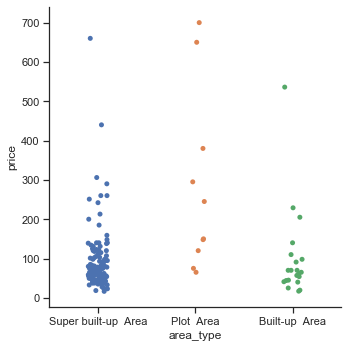

In [63]:
#sns.set(style="ticks", color_codes=True)
tips = pd.read_csv('df_bglr_155.csv')
sns.catplot(x="area_type", y="price", data=tips);

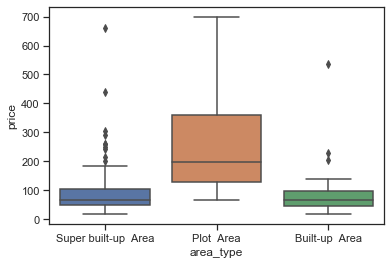

In [64]:
sns.boxplot(x="area_type", y="price", data=tips);

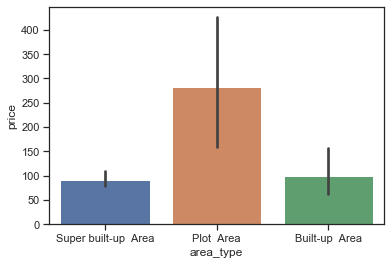

In [65]:
sns.barplot(x="area_type", y="price", data=tips);

### Visualizing Apprtment size vs price 

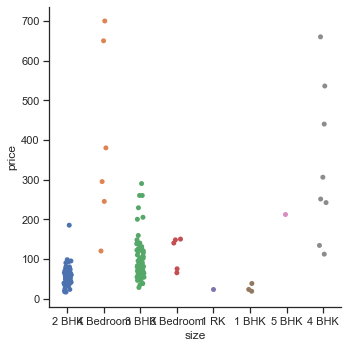

In [66]:
sns.catplot(x="size", y="price", data=tips);

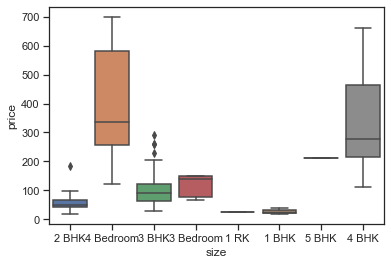

In [67]:
sns.boxplot(x="size", y="price", data=tips);

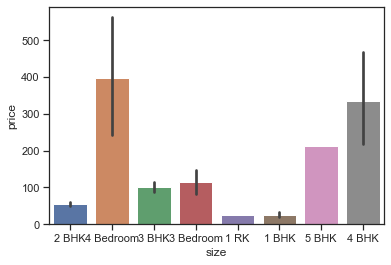

In [68]:
sns.barplot(x="size", y="price", data=tips);

## Plotting the Linear Regression line for future predictions 

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

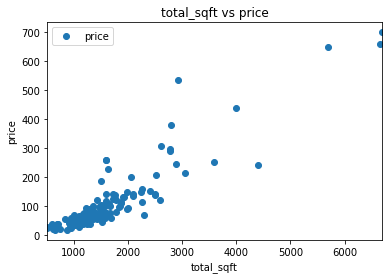

In [8]:
df_bglr_155.plot(x='total_sqft', y='price', style='o')  
plt.title('total_sqft vs price')  
plt.xlabel('total_sqft')  
plt.ylabel('price')  
plt.show()

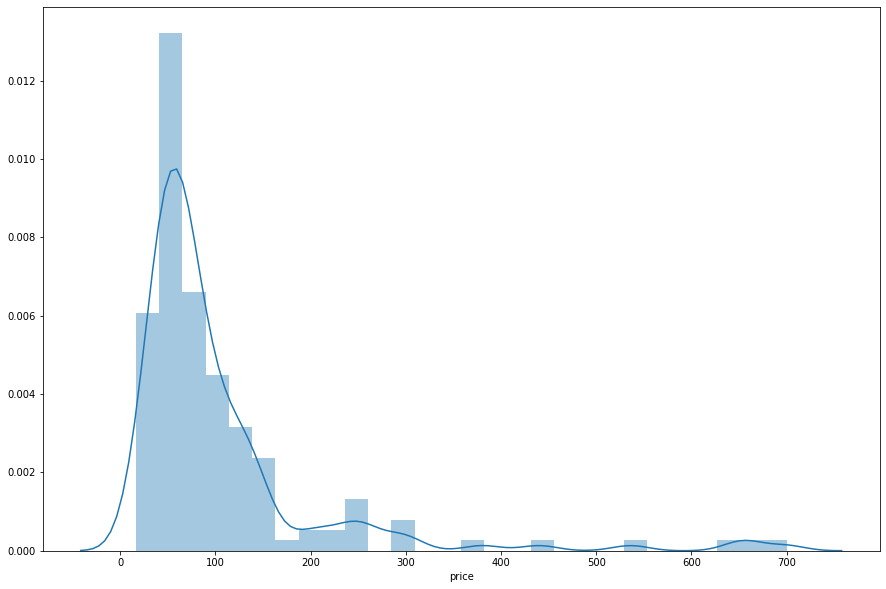

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_bglr_155['price'])

In [196]:
X=df_bglr_155['total_sqft']
print(X)
y=df_bglr_155['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

0      1056
1      2600
2      1521
3      1170
4      2785
5      1000
6      2250
7      1175
8      1180
9      1540
10     2770
11     1755
12     2800
13      510
14      660
15     1151
16     1025
17     1075
18     1760
19     1693
20      700
21     1724
22     1254
23      600
24      970
25     1459
26     1270
27     1670
28     2010
29     1185
       ... 
125    1200
126    6688
127    1830
128    1432
129    2300
130    1639
131    1665
132    2093
133    1450
134    1486
135    1425
136    1255
137     750
138    1274
139    1350
140    1100
141    1760
142    1095
143    1140
144    1530
145    1724
146    1975
147    1112
148     509
149    2265
150    1010
151    1150
152    1850
153     907
154    3596
Name: total_sqft, Length: 155, dtype: int64


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
y_test.size

52

In [11]:
y_pred = regr.predict(X_test.values.reshape(-1,1))
print(y_pred)

[[ 59.61009487]
 [ 45.60878205]
 [ 57.09423397]
 [ 55.45345513]
 [ 73.39263717]
 [198.96691149]
 [100.84833652]
 [ 47.46833141]
 [ 25.04435386]
 [100.84833652]
 [107.4114519 ]
 [ 65.18874294]
 [406.58012808]
 [ 53.48452051]
 [ 51.73435641]
 [111.02116536]
 [100.84833652]
 [142.85227497]
 [245.23687493]
 [  7.87086861]
 [118.34997754]
 [232.11064417]
 [ 94.28522114]
 [ 31.93562501]
 [ 22.09095193]
 [107.95837818]
 [121.19399421]
 [  3.27668784]
 [ 44.07738846]
 [101.3952628 ]
 [657.40052093]
 [ 96.91046729]
 [ 57.42238974]
 [ 89.3628846 ]
 [ 98.22309037]
 [100.84833652]
 [ -3.06765703]
 [ 64.75120192]
 [ 84.44054807]
 [ 37.62365834]
 [ 63.65734935]
 [ 50.53111859]
 [ 57.09423397]
 [ 63.00103782]
 [105.22374678]
 [ 64.75120192]
 [117.80305126]
 [118.34997754]
 [ 89.90981088]
 [ 54.35960256]
 [108.50530447]
 [ 29.74791988]]


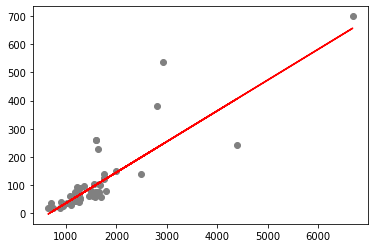

In [12]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red')
plt.show()

In [209]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [231]:
X=pd.DataFrame(np.c_[df_bglr_155['balcony'],df_bglr_155['bath']],columns=['balcony','bath'])
y = pd.DataFrame(np.c_[df_bglr_155['price']],columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [236]:
y.shape

(155, 1)

In [239]:
y_pred=regr.predict(X_test)
print(y_pred)

[[ 63.27152752]
 [ 55.99936581]
 [ 55.99936581]
 [ 55.99936581]
 [ 63.27152752]
 [137.50497391]
 [137.50497391]
 [ 63.27152752]
 [ 63.27152752]
 [144.77713562]
 [ 55.99936581]
 [ 63.27152752]
 [219.01058202]
 [ 63.27152752]
 [ 55.99936581]
 [130.2328122 ]
 [ 48.72720409]
 [226.28274373]
 [211.73842031]
 [ 63.27152752]
 [ 55.99936581]
 [300.51619013]
 [130.2328122 ]
 [ 70.54368923]
 [-18.23408059]
 [137.50497391]
 [137.50497391]
 [ 55.99936581]
 [ 48.72720409]
 [137.50497391]
 [389.29395995]
 [144.77713562]
 [ 55.99936581]
 [ 63.27152752]
 [137.50497391]
 [137.50497391]
 [-18.23408059]
 [ 63.27152752]
 [130.2328122 ]
 [ 63.27152752]
 [ 55.99936581]
 [ 48.72720409]
 [137.50497391]
 [137.50497391]
 [137.50497391]
 [ 55.99936581]
 [144.77713562]
 [137.50497391]
 [ 63.27152752]
 [ 63.27152752]
 [144.77713562]
 [ 63.27152752]]


## Visualizing The Data

In [ ]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    df['total_arrests'],
    # with the labels being officer names
    labels=df['officer_name'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, 0, 0.15),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [13]:
# create map of New York using latitude and longitude values
map_bnglr = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_bglr_155['latitude'], df_bglr_155['longitude'], df_bglr_155['society'], df_bglr_155['location']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bnglr)  
    
map_bnglr

In [14]:
CLIENT_ID = 'S1HVDAACCHCDZCPEP5HTLOLEJU2TURXB3GNZ4DJ0NFCAKK5F' # your Foursquare ID
CLIENT_SECRET = 'RW2FY0ZSEH1YA11NOTDFQEKFYEYMJNDJVWORKBZDXYV1OH23' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S1HVDAACCHCDZCPEP5HTLOLEJU2TURXB3GNZ4DJ0NFCAKK5F
CLIENT_SECRET:RW2FY0ZSEH1YA11NOTDFQEKFYEYMJNDJVWORKBZDXYV1OH23


In [15]:
neighborhood_latitude = df_bglr_155.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df_bglr_155.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = df_bglr_155.loc[0, 'location'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Electronic City Phase II are 12.8468545, 77.6769267.


In [16]:

LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=S1HVDAACCHCDZCPEP5HTLOLEJU2TURXB3GNZ4DJ0NFCAKK5F&client_secret=RW2FY0ZSEH1YA11NOTDFQEKFYEYMJNDJVWORKBZDXYV1OH23&v=20180605&ll=12.8468545,77.6769267&radius=500&limit=50'

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e3114781e152c001bb1086a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': 12.851354504500003,
    'lng': 77.68153362366434},
   'sw': {'lat': 12.842354495499995, 'lng': 77.67231977633566}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e0855c8b61c60b0454a7cbb',
       'name': 'TCS Think Campus',
       'location': {'address': '#42, Electronic City',
        'crossStreet': 'Phase II',
        'lat': 12.847598224906433,
        'lng': 77.6791380938702,
        'labeledLatLngs': [{'la

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.shape

(7, 4)

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
# type your answer here

banglore_venues = getNearbyVenues(names=df_bglr_155['location'],
                                   latitudes=df_bglr_155['latitude'],
                                   longitudes=df_bglr_155['longitude']
                                  )



Electronic City Phase II
Chikka Tirupathi
Lingadheeranahalli
Whitefield
Whitefield
7th Phase JP Nagar
Sarjapur
Mysore Road
Bisuvanahalli
Raja Rajeshwari Nagar
Ramakrishnappa Layout
Binny Pete
Thanisandra
 Thanisandra
Electronic City
Ramagondanahalli
Electronic City
Bisuvanahalli
Hebbal
Raja Rajeshwari Nagar
Kanakpura Road
Kundalahalli
Sarjapur  Road
Ganga Nagar
Doddathoguru
Whitefield
Adarsh Nagar
Bhoganhalli
Whitefield
Lakshminarayana Pura
Yelahanka
Begur Road
Ramakrishnappa Layout
Ganga Nagar
Whitefield
Varthur
Gunjur
Begur Road
Hegde Nagar
Haralur Road
Hennur Road
Cholanayakanahalli
Kodanda Reddy Layout
Yelahanka
EPIP Zone
Dasanapura
Kasavanhalli
Sanjay nagar
Thanisandra
Kengeri
Yeshwanthpur
Chandapura
Kothanur
Green View Layout
Shantiniketan Layout
Rajaji Nagar
Devanahalli
Byatarayanapura
Whitefield
Electronic City
Sarjapur  Road
Kengeri
Thanisandra
Akshaya Nagar
Devanahalli
LB Shastri Nagar
Hormavu
Peenya
Sarjapur
Electronic City
Kudlu Gate
Kanakpura Road
Devanahalli
Chandra Layou

In [70]:
print(banglore_venues.shape)
#banglore_venues.to_csv("banglore_venues.csv")
banglore_venues.head()

(1089, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Electronic City Phase II,12.846854,77.676927,TCS Think Campus,12.847598,77.679138,Coworking Space
1,Electronic City Phase II,12.846854,77.676927,TCS Think Campus Ground,12.848344,77.679267,Basketball Court
2,Electronic City Phase II,12.846854,77.676927,Coffee Day Xpress,12.848827,77.678946,Café
3,Electronic City Phase II,12.846854,77.676927,"Mint-The Kitchen, Think Campus.",12.848941,77.678960,Vegetarian / Vegan Restaurant
4,Electronic City Phase II,12.846854,77.676927,Volga Food Court,12.850519,77.677667,Indian Restaurant


In [23]:
banglore_venues['Venue Category'].unique()

array(['Coworking Space', 'Basketball Court', 'Café',
       'Vegetarian / Vegan Restaurant', 'Indian Restaurant', 'Diner',
       'Restaurant', 'Historic Site', 'Pub', 'Burger Joint',
       'Ice Cream Shop', 'Steakhouse', 'Snack Place',
       'Punjabi Restaurant', 'Chettinad Restaurant',
       'North Indian Restaurant', 'Mediterranean Restaurant',
       'Coffee Shop', 'Liquor Store', 'Seafood Restaurant',
       'Sandwich Place', 'Department Store', 'Farmers Market', 'Lounge',
       'Pizza Place', 'General Entertainment', 'Fast Food Restaurant',
       'Gym', 'Clothing Store', 'Donut Shop', 'Food Court',
       'Bengali Restaurant', 'Park', 'Wine Bar', 'Beer Bar',
       'Breakfast Spot', 'French Restaurant', 'Cocktail Bar', 'Theater',
       'Middle Eastern Restaurant', 'Vietnamese Restaurant',
       'Italian Restaurant', 'Portuguese Restaurant', 'Korean Restaurant',
       'Thai Restaurant', 'Playground', 'Bar', 'Bus Stop',
       'Chinese Restaurant', 'IT Services', 'Train St

In [71]:
FOURSQUARE_SEARCH_URL = 'https://api.foursquare.com/v2/venues/search?'
# SEARCH VENUES BY CATEGORY

# Dataframe : venue_id_recover 
# - store venue id to recover failed venues id score retrieval later if foursquare limit is exceeded when getting score.
venue_id_rcols = ['VenueID']
venue_id_recover = pd.DataFrame(columns=venue_id_rcols)

def getVenuesByCategory(names, latitudes, longitudes, categoryID, radius=500):
    global CLIENT_ID
    global CLIENT_SECRET
    global FOURSQUARE_EXPLORE_URL
    global FOURSQUARE_SEARCH_URL
    global VERSION
    global LIMIT
    venue_columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude','Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    venue_DF = pd.DataFrame(columns=venue_columns)
    print("[#Start getVenuesByCategory]")
    for name, lat, lng in zip(names, latitudes, longitudes):
        #cyclefsk2()
        print(name,",",end='')
        #print('getVenuesByCategory',categoryID,name) ; # DEBUG: be quiet
        # create the API request URL
        url = '{}client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            FOURSQUARE_SEARCH_URL,CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT,categoryID)
        # make the GET request
        results = requests.get(url).json()
        # Populate dataframe with the category venue results
        # Extracting JSON  data values
        
        for jsonSub in results['response']['venues']:
            #print(jsonSub)
            # JSON Results may not be in expected format or incomplete data, in that case, skip!
            ven_id = 0
            try:
                # If there are any issue with a restaurant, retry or ignore and continue
                # Get location details
                ven_id   = jsonSub['id']
                ven_cat  = jsonSub['categories'][0]['pluralName']
                ven_CID  = jsonSub['categories'][0]['id']
                ven_name = jsonSub['name']
                ven_lat  = jsonSub['location']['lat']
                ven_lng  = jsonSub['location']['lng']
                venue_DF = venue_DF.append({
                    'Town'      : name,
                    'Town Latitude' : lat,
                    'Town Longitude': lng,
                    'VenueID'   : ven_id,
                    'VenueName' : ven_name,
                    'score'     : 'nan',
                    'category'  : ven_cat,
                    'catID'     : ven_CID,
                    'latitude'  : ven_lat,
                    'longitude' : ven_lng}, ignore_index=True)
            except:
                continue
    # END OF LOOP, return.
    print("\n[#Done getVenuesByCategory]")
    return(venue_DF)

In [72]:
venue_columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude','Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
banglore_town_venues = pd.DataFrame(columns=venue_columns)

In [26]:
if(0):
    categoryID = "4d4b7105d754a06377d81259"
    town_names = ['Electronic City Phase II']
    lat_list   = [12.846854]
    lng_list   = [77.676927]
    tmp = getVenuesByCategory(names=town_names,latitudes=lat_list,longitudes=lng_list,categoryID=categoryID)
    banglore_town_venues = pd.concat([banglore_town_venues,tmp], ignore_index=True)

In [73]:
banglore_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Thanisandra,15,15,15,15,15,15
7th Phase JP Nagar,42,42,42,42,42,42
Abbigere,9,9,9,9,9,9
Akshaya Nagar,46,46,46,46,46,46
Anandapura,47,47,47,47,47,47
BCMC Layout,4,4,4,4,4,4
Badavala Nagar,6,6,6,6,6,6
Bannerghatta Road,8,8,8,8,8,8
Begur Road,1,1,1,1,1,1


In [90]:
# one hot encoding
banglore_onehot = pd.get_dummies(banglore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
banglore_onehot['Neighborhood'] = banglore_venues['Neighborhood'] 
# banglore_onehot['Neighborhood Latitude'] = banglore_venues['Neighborhood Latitude'] 
# banglore_onehot['Neighborhood Longitude'] = banglore_venues['Neighborhood Longitude'] 
# move neighborhood column to the first column
fixed_columns = [banglore_onehot.columns[-1]] + list(banglore_onehot.columns[:-1])
banglore_onehot = banglore_onehot[fixed_columns]

banglore_onehot.head()

,Women's Store,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,...,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
banglore_grouped = banglore_onehot.groupby('Neighborhood').mean().reset_index()
banglore_grouped

,Neighborhood,Women's Store,ATM,Accessories Store,American Restaurant,Andhra Restaurant,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Tibetan Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Wine Bar
0,Thanisandra,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
1,7th Phase JP Nagar,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.02381,0.000000,0.02381
2,Abbigere,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
3,Akshaya Nagar,0.000000,0.000000,0.0,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.021739,0.00000,0.000000,0.00000
4,Anandapura,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,...,0.000000,0.0,0.00,0.021277,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
5,BCMC Layout,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
6,Badavala Nagar,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
7,Bannerghatta Road,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
8,Begur Road,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000
9,Bisuvanahalli,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.00000


In [92]:
num_top_venues = 10

for hood in banglore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = banglore_grouped[banglore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Thanisandra----
                venue  freq
0  Chinese Restaurant  0.20
1                Café  0.13
2   Convenience Store  0.13
3        Liquor Store  0.07
4      Ice Cream Shop  0.07
5              Bakery  0.07
6         Bus Station  0.07
7         Pizza Place  0.07
8   Indian Restaurant  0.07
9    Department Store  0.07


----7th Phase JP Nagar----
               venue  freq
0        Pizza Place  0.10
1                Pub  0.10
2               Café  0.07
3  Indian Restaurant  0.07
4       Cocktail Bar  0.07
5                Bar  0.05
6           Bus Stop  0.05
7  French Restaurant  0.05
8        Coffee Shop  0.05
9    Thai Restaurant  0.05


----Abbigere----
                venue  freq
0        Liquor Store  0.22
1    Department Store  0.11
2               Hotel  0.11
3                Café  0.11
4                 Bar  0.11
5    Asian Restaurant  0.11
6       Bowling Alley  0.11
7  Italian Restaurant  0.11
8         Pizza Place  0.00
9       Movie Theater  0.00


----Akshaya Naga

                       venue  freq
0          Indian Restaurant  0.15
1       Fast Food Restaurant  0.06
2                Pizza Place  0.05
3             Ice Cream Shop  0.05
4                       Café  0.04
5                Coffee Shop  0.04
6                Snack Place  0.03
7         Chinese Restaurant  0.03
8             Sandwich Place  0.03
9  Middle Eastern Restaurant  0.03


----Electronic City Phase II----
                            venue  freq
0               Indian Restaurant  0.29
1                 Coworking Space  0.14
2                            Café  0.14
3   Vegetarian / Vegan Restaurant  0.14
4                           Diner  0.14
5                Basketball Court  0.14
6                   Movie Theater  0.00
7  Multicuisine Indian Restaurant  0.00
8                       Multiplex  0.00
9                     Music Venue  0.00


----Electronics City Phase 1----
                            venue  freq
0               Indian Restaurant  0.25
1                     Sup

                    venue  freq
0       Indian Restaurant  0.14
1    Fast Food Restaurant  0.10
2                  Lounge  0.05
3             Snack Place  0.05
4  Furniture / Home Store  0.05
5          Breakfast Spot  0.05
6           Shopping Mall  0.05
7                    Café  0.05
8      Seafood Restaurant  0.05
9                     Gym  0.05


----Kasavanhalli----
                     venue  freq
0        Indian Restaurant  0.14
1               Food Truck  0.14
2                     Park  0.14
3              Snack Place  0.14
4         Asian Restaurant  0.14
5                   Temple  0.14
6                   Bakery  0.14
7  New American Restaurant  0.00
8          Motorcycle Shop  0.00
9            Movie Theater  0.00


----Kathriguppe----
                            venue  freq
0               Indian Restaurant  0.33
1                  Discount Store  0.33
2                     Auto Garage  0.33
3                    Noodle House  0.00
4               Mobile Phone Shop  0.00


                            venue  freq
0              Seafood Restaurant   0.2
1                  Breakfast Spot   0.2
2                     IT Services   0.2
3            Fast Food Restaurant   0.2
4                 Badminton Court   0.2
5                   Women's Store   0.0
6                   Movie Theater   0.0
7  Multicuisine Indian Restaurant   0.0
8                       Multiplex   0.0
9                     Music Venue   0.0


----Sarjapur  Road----
                     venue  freq
0                     Café  0.12
1        Indian Restaurant  0.08
2                      ATM  0.08
3      Sporting Goods Shop  0.04
4                   Bakery  0.04
5            Shopping Mall  0.04
6           Breakfast Spot  0.04
7                 Pharmacy  0.04
8  New American Restaurant  0.04
9               Food Court  0.04


----Sathya Sai Layout----
                            venue  freq
0               Convenience Store  0.33
1                            Park  0.33
2              Tibetan R

In [93]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [102]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = banglore_grouped['Neighborhood']

for ind in np.arange(banglore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(banglore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Thanisandra,Chinese Restaurant,Convenience Store,Café,Bakery,Indian Restaurant,Liquor Store,Dessert Shop,Department Store,Pizza Place,Bus Station
1,7th Phase JP Nagar,Pub,Pizza Place,Café,Cocktail Bar,Indian Restaurant,French Restaurant,Bus Stop,Bar,Coffee Shop,Thai Restaurant
2,Abbigere,Liquor Store,Department Store,Asian Restaurant,Bar,Café,Bowling Alley,Italian Restaurant,Hotel,Diner,Falafel Restaurant
3,Akshaya Nagar,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Korean Restaurant,Brewery,Restaurant,BBQ Joint,Coffee Shop,Electronics Store,Café
4,Anandapura,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Burger Joint,Italian Restaurant,Electronics Store,Sandwich Place,Restaurant


In [100]:
neighborhoods_venues_sorted['Neighborhood Latitude'] = banglore_venues['Neighborhood Latitude'].astype(float)
neighborhoods_venues_sorted['Neighborhood Longitude'] = banglore_venues['Neighborhood Longitude'].astype(float)


In [103]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Thanisandra,Chinese Restaurant,Convenience Store,Café,Bakery,Indian Restaurant,Liquor Store,Dessert Shop,Department Store,Pizza Place,Bus Station
1,7th Phase JP Nagar,Pub,Pizza Place,Café,Cocktail Bar,Indian Restaurant,French Restaurant,Bus Stop,Bar,Coffee Shop,Thai Restaurant
2,Abbigere,Liquor Store,Department Store,Asian Restaurant,Bar,Café,Bowling Alley,Italian Restaurant,Hotel,Diner,Falafel Restaurant
3,Akshaya Nagar,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Korean Restaurant,Brewery,Restaurant,BBQ Joint,Coffee Shop,Electronics Store,Café
4,Anandapura,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Burger Joint,Italian Restaurant,Electronics Store,Sandwich Place,Restaurant
5,BCMC Layout,Indian Restaurant,Coffee Shop,Italian Restaurant,Bus Station,Wine Bar,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market
6,Badavala Nagar,Karnataka Restaurant,Indian Sweet Shop,Fast Food Restaurant,Resort,Metro Station,Pizza Place,Department Store,Dessert Shop,Flea Market,Farmers Market
7,Bannerghatta Road,Indian Restaurant,Restaurant,Breakfast Spot,Lighthouse,Multicuisine Indian Restaurant,Bakery,Café,Wine Bar,Fast Food Restaurant,Farmers Market
8,Begur Road,ATM,Wine Bar,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
9,Bisuvanahalli,Pharmacy,Hotel,Pizza Place,Indian Restaurant,Food Truck,Seafood Restaurant,Karnataka Restaurant,Fast Food Restaurant,Gas Station,Restaurant


In [242]:
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()

Indian Restaurant          25
Coffee Shop                 4
Café                        3
Pharmacy                    3
Restaurant                  3
South Indian Restaurant     3
Platform                    2
Ice Cream Shop              2
Bakery                      2
Hotel                       2
Fast Food Restaurant        2
IT Services                 1
University                  1
Electronics Store           1
Sporting Goods Shop         1
Liquor Store                1
Breakfast Spot              1
Pizza Place                 1
Dog Run                     1
Convenience Store           1
Bowling Alley               1
Badminton Court             1
Clothing Store              1
Pub                         1
Chinese Restaurant          1
Auto Garage                 1
Bus Station                 1
Business Service            1
Kitchen Supply Store        1
Karnataka Restaurant        1
Park                        1
Food Truck                  1
ATM                         1
Name: 1st 

In [104]:
from sklearn.cluster import KMeans

In [105]:
# set number of clusters
kclusters = 10

banglore_grouped_clustering = banglore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=42).fit(banglore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:11] 
print(neighborhoods_venues_sorted)

                Neighborhood    1st Most Common Venue  \
0                Thanisandra       Chinese Restaurant   
1         7th Phase JP Nagar                      Pub   
2                   Abbigere             Liquor Store   
3              Akshaya Nagar     Fast Food Restaurant   
4                 Anandapura        Indian Restaurant   
5                BCMC Layout        Indian Restaurant   
6             Badavala Nagar     Karnataka Restaurant   
7          Bannerghatta Road        Indian Restaurant   
8                 Begur Road                      ATM   
9              Bisuvanahalli                 Pharmacy   
10               Bommasandra        Indian Restaurant   
11           Byatarayanapura        Indian Restaurant   
12                Chandapura                     Café   
13            Chandra Layout        Indian Restaurant   
14        Cholanayakanahalli                   Bakery   
15              Choodasandra                 Platform   
16             Church Street   

In [106]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

banglore_merged = df_bglr_155

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
banglore_merged = banglore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='location')

banglore_merged # check the last columns!

,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Super built-up Area,19-Dec,1.0,2.0,12.846854,Electronic City Phase II,77.676927,39.07,2 BHK,Coomee,...,Indian Restaurant,Coworking Space,Vegetarian / Vegan Restaurant,Basketball Court,Diner,Café,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant
1,Plot Area,Ready To Move,3.0,5.0,12.895768,Chikka Tirupathi,77.867101,120.00,4 Bedroom,Theanmp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Super built-up Area,Ready To Move,1.0,3.0,12.580537,Lingadheeranahalli,77.333067,95.00,3 BHK,Soiewre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,1.0,2.0,25.709878,Whitefield,32.658512,38.00,2 BHK,DuenaTa,...,Indian Restaurant,Café,Restaurant,Department Store,Fast Food Restaurant,Bakery,Pub,Coffee Shop,Sandwich Place,Ice Cream Shop
4,Plot Area,Ready To Move,3.0,5.0,12.911623,Whitefield,77.638862,295.00,4 Bedroom,Prrry M,...,Indian Restaurant,Café,Restaurant,Department Store,Fast Food Restaurant,Bakery,Pub,Coffee Shop,Sandwich Place,Ice Cream Shop
5,Super built-up Area,Ready To Move,1.0,2.0,51.461952,7th Phase JP Nagar,-0.159617,38.00,2 BHK,Shncyes,...,Pub,Pizza Place,Café,Cocktail Bar,Indian Restaurant,French Restaurant,Bus Stop,Bar,Coffee Shop,Thai Restaurant
6,Plot Area,Ready To Move,2.0,3.0,12.977895,Sarjapur,77.516479,148.00,3 Bedroom,Skityer,...,IT Services,Breakfast Spot,Fast Food Restaurant,Seafood Restaurant,Badminton Court,Eastern European Restaurant,Food,Flea Market,Farmers Market,Falafel Restaurant
7,Super built-up Area,Ready To Move,2.0,2.0,12.917657,Mysore Road,77.483757,73.50,2 BHK,PrntaEn,...,Ice Cream Shop,Pizza Place,Dry Cleaner,Train Station,Café,ATM,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant
8,Super built-up Area,Ready To Move,2.0,3.0,13.054713,Bisuvanahalli,77.633926,48.00,3 BHK,Prityel,...,Pharmacy,Hotel,Pizza Place,Indian Restaurant,Food Truck,Seafood Restaurant,Karnataka Restaurant,Fast Food Restaurant,Gas Station,Restaurant
9,Super built-up Area,Ready To Move,3.0,3.0,12.936439,Raja Rajeshwari Nagar,77.666984,60.00,3 BHK,GrrvaGr,...,Pizza Place,Lake,Breakfast Spot,Badminton Court,Indian Restaurant,Restaurant,Food Court,Food,Sandwich Place,Fast Food Restaurant


In [107]:
#banglore_merged.drop(banglore_merged.loc[banglore_merged['1st Most Common Venue']==np.NaN].index, inplace=True)
banglore_merged = banglore_merged.dropna()

In [108]:
#banglore_merged=banglore_merged.reset_index()
banglore_merged['Cluster Labels']

0      5.0
3      3.0
4      3.0
5      3.0
6      3.0
7      3.0
8      3.0
9      3.0
10     3.0
12     4.0
13     3.0
14     3.0
15     5.0
16     3.0
17     3.0
18     3.0
19     3.0
20     3.0
21     2.0
22     3.0
23     2.0
24     3.0
25     3.0
28     3.0
29     3.0
30     3.0
31     7.0
32     3.0
33     2.0
34     3.0
      ... 
121    3.0
122    5.0
123    5.0
124    3.0
125    0.0
126    0.0
127    9.0
129    0.0
130    3.0
131    3.0
132    3.0
133    3.0
134    2.0
136    3.0
137    3.0
138    3.0
139    5.0
141    3.0
142    3.0
143    5.0
144    3.0
145    2.0
146    3.0
147    3.0
148    5.0
150    5.0
151    5.0
152    3.0
153    3.0
154    3.0
Name: Cluster Labels, Length: 130, dtype: float64

In [112]:
#banglore_merged.to_csv('banglore_merged_final.csv')
banglore_merged

,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Super built-up Area,19-Dec,1.0,2.0,12.846854,Electronic City Phase II,77.676927,39.07,2 BHK,Coomee,...,Indian Restaurant,Coworking Space,Vegetarian / Vegan Restaurant,Basketball Court,Diner,Café,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant
3,Super built-up Area,Ready To Move,1.0,2.0,25.709878,Whitefield,32.658512,38.00,2 BHK,DuenaTa,...,Indian Restaurant,Café,Restaurant,Department Store,Fast Food Restaurant,Bakery,Pub,Coffee Shop,Sandwich Place,Ice Cream Shop
4,Plot Area,Ready To Move,3.0,5.0,12.911623,Whitefield,77.638862,295.00,4 Bedroom,Prrry M,...,Indian Restaurant,Café,Restaurant,Department Store,Fast Food Restaurant,Bakery,Pub,Coffee Shop,Sandwich Place,Ice Cream Shop
5,Super built-up Area,Ready To Move,1.0,2.0,51.461952,7th Phase JP Nagar,-0.159617,38.00,2 BHK,Shncyes,...,Pub,Pizza Place,Café,Cocktail Bar,Indian Restaurant,French Restaurant,Bus Stop,Bar,Coffee Shop,Thai Restaurant
6,Plot Area,Ready To Move,2.0,3.0,12.977895,Sarjapur,77.516479,148.00,3 Bedroom,Skityer,...,IT Services,Breakfast Spot,Fast Food Restaurant,Seafood Restaurant,Badminton Court,Eastern European Restaurant,Food,Flea Market,Farmers Market,Falafel Restaurant
7,Super built-up Area,Ready To Move,2.0,2.0,12.917657,Mysore Road,77.483757,73.50,2 BHK,PrntaEn,...,Ice Cream Shop,Pizza Place,Dry Cleaner,Train Station,Café,ATM,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant
8,Super built-up Area,Ready To Move,2.0,3.0,13.054713,Bisuvanahalli,77.633926,48.00,3 BHK,Prityel,...,Pharmacy,Hotel,Pizza Place,Indian Restaurant,Food Truck,Seafood Restaurant,Karnataka Restaurant,Fast Food Restaurant,Gas Station,Restaurant
9,Super built-up Area,Ready To Move,3.0,3.0,12.936439,Raja Rajeshwari Nagar,77.666984,60.00,3 BHK,GrrvaGr,...,Pizza Place,Lake,Breakfast Spot,Badminton Court,Indian Restaurant,Restaurant,Food Court,Food,Sandwich Place,Fast Food Restaurant
10,Super built-up Area,Ready To Move,2.0,4.0,13.054713,Ramakrishnappa Layout,77.633926,290.00,3 BHK,PeBayle,...,Pharmacy,Shopping Mall,Historic Site,Indian Restaurant,Karnataka Restaurant,Gas Station,Palace,Chinese Restaurant,Hotel,Andhra Restaurant
12,Plot Area,Ready To Move,2.0,5.0,13.100698,Thanisandra,77.596345,380.00,4 Bedroom,Soitya,...,South Indian Restaurant,Vegetarian / Vegan Restaurant,Train Station,Indian Restaurant,Restaurant,Wine Bar,Dry Cleaner,Flea Market,Fast Food Restaurant,Farmers Market


In [40]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(banglore_merged['latitude'], banglore_merged['longitude'], banglore_merged['location'], banglore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## So where Can You establish a New "Restaurant" with very minimal Competition? And Available to Move Right Away

In [159]:
best_places_for_restaurant = banglore_merged[(~banglore_merged["1st Most Common Venue"].str.contains('Restaurant'))&(~banglore_merged["2nd Most Common Venue"].str.contains('Restaurant'))]


In [160]:
best_places_for_restaurant=best_places_for_restaurant.loc[best_places_for_restaurant['availability'] == 'Ready To Move']
best_places_for_restaurant=best_places_for_restaurant.sort_values("price")
#best_places_for_restaurant.to_csv("best_places_for_restaurant.csv")

In [161]:
best_places_for_restaurant

,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Super built-up Area,Ready To Move,1.0,2.0,19.206847,Bisuvanahalli,72.867153,35.00,3 BHK,Prityel,...,Pharmacy,Hotel,Pizza Place,Indian Restaurant,Food Truck,Seafood Restaurant,Karnataka Restaurant,Fast Food Restaurant,Gas Station,Restaurant
5,Super built-up Area,Ready To Move,1.0,2.0,51.461952,7th Phase JP Nagar,-0.159617,38.00,2 BHK,Shncyes,...,Pub,Pizza Place,Café,Cocktail Bar,Indian Restaurant,French Restaurant,Bus Stop,Bar,Coffee Shop,Thai Restaurant
77,Super built-up Area,Ready To Move,1.0,2.0,12.920441,Abbigere,77.665328,40.80,2 BHK,SLtias,...,Liquor Store,Department Store,Asian Restaurant,Bar,Café,Bowling Alley,Italian Restaurant,Hotel,Diner,Falafel Restaurant
136,Super built-up Area,Ready To Move,2.0,2.0,12.927441,Raja Rajeshwari Nagar,77.515522,42.54,2 BHK,GrrvaGr,...,Pizza Place,Lake,Breakfast Spot,Badminton Court,Indian Restaurant,Restaurant,Food Court,Food,Sandwich Place,Fast Food Restaurant
31,Super built-up Area,Ready To Move,2.0,2.0,12.186636,Begur Road,77.099795,44.00,2 BHK,Dhalsh,...,ATM,Wine Bar,Dumpling Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
125,Super built-up Area,Ready To Move,2.0,2.0,12.922544,Nobo Nagar,77.663343,45.00,2 BHK,VRaceer,...,Bowling Alley,Hotel,Liquor Store,Bar,Asian Restaurant,Eastern European Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant
8,Super built-up Area,Ready To Move,2.0,3.0,13.054713,Bisuvanahalli,77.633926,48.00,3 BHK,Prityel,...,Pharmacy,Hotel,Pizza Place,Indian Restaurant,Food Truck,Seafood Restaurant,Karnataka Restaurant,Fast Food Restaurant,Gas Station,Restaurant
105,Super built-up Area,Ready To Move,2.0,2.0,12.955703,Jigani,77.531333,49.50,2 BHK,DLhtsen,...,Coffee Shop,Ice Cream Shop,Seafood Restaurant,Asian Restaurant,Gym,Dry Cleaner,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
98,Super built-up Area,Ready To Move,1.0,2.0,14.077157,Choodasandra,75.212456,50.00,2 BHK,GRhtiru,...,Platform,Wine Bar,Dry Cleaner,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Eastern European Restaurant
54,Super built-up Area,Ready To Move,2.0,2.0,12.956232,Shantiniketan Layout,77.605888,50.00,2 BHK,Maest N,...,Sporting Goods Shop,Hotel,Candy Store,Cosmetics Shop,Department Store,Eastern European Restaurant,Food & Drink Shop,Food,Flea Market,Fast Food Restaurant


In [162]:
# create map of New York using latitude and longitude values
map_bnglr = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(best_places_for_restaurant['latitude'], best_places_for_restaurant['longitude'], best_places_for_restaurant['society'], best_places_for_restaurant['location']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bnglr)  
    
map_bnglr

## Best Place To Establish a "Badminton Court" and available to Move Right Away

In [163]:
best_places_for_badminton_court = banglore_merged[(~banglore_merged["1st Most Common Venue"].str.contains('Badminton Court'))&(~banglore_merged["2nd Most Common Venue"].str.contains('Badminton Court'))]


In [164]:
best_places_for_badminton_court=best_places_for_badminton_court.loc[best_places_for_badminton_court['availability'] == 'Ready To Move']
best_places_for_badminton_court=best_places_for_badminton_court.sort_values("price")
#best_places_for_badminton_court.to_csv("best_places_for_badminton_court.csv")

In [165]:
best_places_for_badminton_court

,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
69,Super built-up Area,Ready To Move,1.0,1.0,13.074632,Electronic City,77.504859,16.50,2 BHK,Itelaa,...,Indian Restaurant,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Coffee Shop,Café,Chinese Restaurant,Snack Place,Bakery,Sandwich Place
51,Built-up Area,Ready To Move,1.0,1.0,12.987659,Chandapura,77.737713,17.00,2 BHK,KHityry,...,Café,Indian Restaurant,Fast Food Restaurant,Pizza Place,Bookstore,Shopping Mall,BBQ Joint,Restaurant,Juice Bar,Bus Station
137,Built-up Area,Ready To Move,1.0,2.0,12.996845,Electronic City,77.613017,19.50,2 BHK,Itelaa,...,Indian Restaurant,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Coffee Shop,Café,Chinese Restaurant,Snack Place,Bakery,Sandwich Place
14,Super built-up Area,Ready To Move,1.0,1.0,12.849678,Electronic City,77.664975,23.10,2 BHK,Itelaa,...,Indian Restaurant,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Coffee Shop,Café,Chinese Restaurant,Snack Place,Bakery,Sandwich Place
79,Built-up Area,Ready To Move,1.0,2.0,12.881595,Bommasandra,77.607599,25.00,2 BHK,ALoraAu,...,Indian Restaurant,South Indian Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Coffee Shop,Women's Store,Snack Place,Flea Market,Fast Food Restaurant,Dumpling Restaurant
142,Super built-up Area,Ready To Move,2.0,2.0,12.959966,Chandapura,77.719206,28.00,3 BHK,Arhid O,...,Café,Indian Restaurant,Fast Food Restaurant,Pizza Place,Bookstore,Shopping Mall,BBQ Joint,Restaurant,Juice Bar,Bus Station
24,Super built-up Area,Ready To Move,0.0,2.0,12.976959,Doddathoguru,77.512316,33.00,2 BHK,LancyRe,...,Breakfast Spot,Indian Restaurant,Pizza Place,Multiplex,Sandwich Place,Restaurant,Café,Chinese Restaurant,Dessert Shop,Nightclub
17,Super built-up Area,Ready To Move,1.0,2.0,19.206847,Bisuvanahalli,72.867153,35.00,3 BHK,Prityel,...,Pharmacy,Hotel,Pizza Place,Indian Restaurant,Food Truck,Seafood Restaurant,Karnataka Restaurant,Fast Food Restaurant,Gas Station,Restaurant
76,Super built-up Area,Ready To Move,1.0,2.0,12.976959,Bannerghatta Road,77.512316,35.00,2 BHK,DSnjh S,...,Indian Restaurant,Restaurant,Breakfast Spot,Lighthouse,Multicuisine Indian Restaurant,Bakery,Café,Wine Bar,Fast Food Restaurant,Farmers Market
5,Super built-up Area,Ready To Move,1.0,2.0,51.461952,7th Phase JP Nagar,-0.159617,38.00,2 BHK,Shncyes,...,Pub,Pizza Place,Café,Cocktail Bar,Indian Restaurant,French Restaurant,Bus Stop,Bar,Coffee Shop,Thai Restaurant


In [166]:
# create map of New York using latitude and longitude values
map_bnglr = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(best_places_for_badminton_court['latitude'], best_places_for_badminton_court['longitude'], best_places_for_badminton_court['society'], best_places_for_badminton_court['location']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bnglr)  
    
map_bnglr

## I Wanted My Appartment Close to Bus Stop, So where Should i rent?

In [248]:
placenearestto_bustand = banglore_merged[(banglore_merged["1st Most Common Venue"]=="Bus Station")|(banglore_merged["2nd Most Common Venue"]=="Bus Station")]


In [249]:
placenearestto_bustand

,area_type,availability,balcony,bath,latitude,location,longitude,price,size,society,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
40,Super built-up Area,Ready To Move,2.0,3.0,12.823898,Hennur Road,77.391134,140.00,3 BHK,Anavi B,...,Indian Restaurant,Bus Station,Café,Wine Bar,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
80,Super built-up Area,Ready To Move,1.0,3.0,12.830120,Hennur Road,77.681170,131.00,3 BHK,SaireSa,...,Indian Restaurant,Bus Station,Café,Wine Bar,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
99,Super built-up Area,Ready To Move,1.0,2.0,12.991903,Jalahalli East,77.716201,42.48,2 BHK,ShshaSa,...,Indian Restaurant,Bus Station,Wine Bar,Dumpling Restaurant,Food,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
112,Super built-up Area,Ready To Move,2.0,2.0,13.009855,Hoodi,77.693089,55.00,2 BHK,Sulla S,...,Bus Station,Indian Restaurant,Flea Market,Mobile Phone Shop,Clothing Store,Wine Bar,Dumpling Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [250]:
# create map of New York using latitude and longitude values
map_bnglr = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(placenearestto_bustand['latitude'], placenearestto_bustand['longitude'], placenearestto_bustand['society'], placenearestto_bustand['location']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bnglr)  
    
map_bnglr